In [48]:
import numpy as np
import pandas as pd
import seaborn as sns 
import csv
import math
import cv2
from numpy.linalg import lstsq,solve
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from Utilities import PlotImages
from sklearn.preprocessing import LabelEncoder

In [2]:
def LinearRegressor(w,X):
    yh = np.matmul(X, w)
    return yh

def MSE(y, yh):
    mse = ((y-yh)**2).mean()
    return mse

## 2

# save images and labels into blood_cell_train and blood_cell_test

In [68]:
# blood_cell_train

In [69]:
directory = './Data/dataset2-master/images/TRAIN/'

In [70]:
generator = ImageDataGenerator(rescale = 1/255)
image_generator = generator.flow_from_directory(directory,
                                               target_size=(32,32),
                                               batch_size =10000,
                                               class_mode='sparse')

Found 9957 images belonging to 4 classes.


In [71]:
images, labels = image_generator.next()

In [72]:
labels = labels.astype('int')
labels

array([0, 3, 2, ..., 0, 2, 2])

In [73]:
label_names = list(image_generator.class_indices)
label_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [74]:
# save preprocessed iamges and labels
np.save('images',images)
np.save('labels',labels)
np.save('label_names',label_names)

In [75]:
np.savez('./Data/blood_cell_train', train_images = images, train_labels = labels, train_label_names= label_names)

In [76]:
# blood_cell_test
directory = './Data/dataset2-master/images/TEST/'
generator = ImageDataGenerator(rescale = 1/255)
image_generator = generator.flow_from_directory(directory,
                                               target_size=(32,32),
                                               batch_size =10000,
                                               class_mode='sparse')
images, labels = image_generator.next()

labels = labels.astype('int')

label_names = list(image_generator.class_indices)
np.savez('./Data/blood_cell_test', test_images = images, test_labels = labels, test_label_names= label_names)

Found 2487 images belonging to 4 classes.


# Baseline

In [77]:
WBC = np.load('./Data/blood_cell_train.npz')

In [78]:
WBC.files

['train_images', 'train_labels', 'train_label_names']

In [79]:
labels = WBC['train_labels']
labels

array([0, 3, 2, ..., 0, 2, 2])

In [80]:
images = WBC['train_images']
images.shape

(9957, 32, 32, 3)

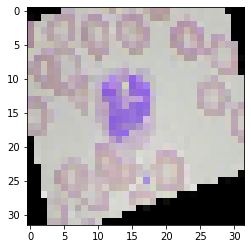

In [81]:
plt.imshow(images[1,:,:])

In [82]:
X = images.reshape(9957,32*32*3)
X.shape

(9957, 3072)

In [83]:
y = WBC['train_labels']
y

array([0, 3, 2, ..., 0, 2, 2])

In [84]:
# one-hot-encoding
Y = np.zeros((9957,10))
for i in range(9957):
    Y[i,y[i]] = 1

In [85]:
w = lstsq(X,Y,rcond=None)[0]
print(w.shape)
w

(3072, 10)


array([[-0.19986223, -0.03867375,  0.06577508, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05901311, -0.00350394, -0.04976801, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09619761,  0.07967955, -0.01314885, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.34070127, -0.18110947,  0.06779543, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18316203,  0.28051252,  0.08144323, ...,  0.        ,
         0.        ,  0.        ],
       [-0.49462198, -0.15433471, -0.13844709, ...,  0.        ,
         0.        ,  0.        ]])

In [86]:
Yh = np.matmul(X,w)

In [87]:
yh = Yh.argmax(axis=1)
yh

array([0, 3, 2, ..., 0, 2, 2], dtype=int64)

In [88]:
y = Y.argmax(axis=1)
y

array([0, 3, 2, ..., 0, 2, 2], dtype=int64)

In [89]:
diff = (y!=yh).sum()
diff

2443

In [90]:
total = len(y)
total

9957

In [91]:
diff/total

0.2453550266144421

In [92]:
1-Y.mean(axis=0).max()

0.7490207893943959

The error rate of Linear Classifier,0.245 is much lower than the baseline error rate, 0.749.

In [93]:
# wrong labels
images1 = images[(y!=yh),:,:]
labels1= labels[(y!=yh)]
labels1_pred = yh[(y!=yh)]

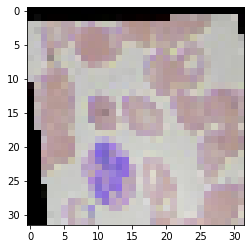

Actual label: EOSINOPHIL
Predicted label: MONOCYTE


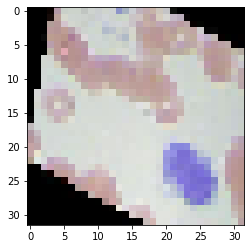

Actual label: MONOCYTE
Predicted label: LYMPHOCYTE


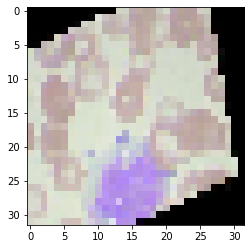

Actual label: MONOCYTE
Predicted label: NEUTROPHIL


In [95]:
for i in range(3):
    plt.imshow(images1[i,:,:],cmap='Greys_r')
    plt.show()
    print('Actual label:',label_names[labels1[i]])
    print('Predicted label:',label_names[labels1_pred[i]])